In [1]:
import pandas as pd
import numpy as np

In [3]:
data = np.array([[99999,2,0,9],[35,8,4,7],[27,23,1,99]])
data_raw= pd.DataFrame({'Column1': data[:,0],'Column2': data[:,1],'Column3': data[:,2],'Column4': data[:,3]})
data_raw

,Column1,Column2,Column3,Column4
0,99999,2,0,9
1,35,8,4,7
2,27,23,1,99


# Normalisation

In [7]:

from sklearn import preprocessing
normalised_data = preprocessing.normalize(data)
normalised_data

array([[9.99999996e-01, 2.00001999e-05, 0.00000000e+00, 9.00008996e-05],
       [9.51171244e-01, 2.17410570e-01, 1.08705285e-01, 1.90234249e-01],
       [2.56735663e-01, 2.18700750e-01, 9.50872826e-03, 9.41364098e-01]])

In [9]:
dataset = pd.DataFrame({'Column1': normalised_data[:,0],'Column2': normalised_data[:,1],'Column3': normalised_data[:,2],'Column4': normalised_data[:,3]})
dataset

,Column1,Column2,Column3,Column4
0,1.000000,0.000020,0.000000,0.000090
1,0.951171,0.217411,0.108705,0.190234
2,0.256736,0.218701,0.009509,0.941364


# Standardisation

In [15]:
from sklearn.preprocessing import StandardScaler
standard_data = StandardScaler().fit_transform(data_raw)
dataset_standard = pd.DataFrame({'Column1': standard_data[:,0],'Column2': standard_data[:,1],'Column3': standard_data[:,2],'Column4': standard_data[:,3]})
dataset_standard

,Column1,Column2,Column3,Column4
0,1.414214,-1.019049,-0.980581,-0.683672
1,-0.707022,-0.339683,1.372813,-0.730286
2,-0.707192,1.358732,-0.392232,1.413957


# Categorical Binning 

In [16]:
countries = pd.Series([
        'United States',
        'Canada',
        'Spain',
        'Italy',
        'Chile',
        'Brazil',
        'North Korea',
        'Vietnam',
        'Thailand',
        'Malaysia',
        'Mayanmar',
        'Iceland',
        'Germany',
        'Cuba',
        'Mexico'
    ], name = "Countries")

groups = {
        'North America': ('United States', 'Canada', 'Iceland', 'Greenland', 'Mexico'),
        'Europe': ('France', 'Germany', 'United Kingdom', 'Belgium', 'Spain', 'Italy', 'Poland'),
        'South America': ('Chile', 'Brazil', 'Peru', 'Colombia', 'Ecuador'),
        'Asia': ('North Korea', 'Vietnam', 'Thailand', 'Malaysia', 'Mayanmar')
    }

In [22]:
from typing import Any
def country_group_map(series: pd.Series, groups: dict,
                   othervalue: Any=-1) -> pd.Series:
    # Assign the dictionary pairs
    groups = {z: j for j, r in groups.items() for z in r}
    return series.map(groups).fillna(othervalue)

In [25]:
grouped_countries = country_group_map(countries, groups, othervalue = 'other')
df = pd.concat([countries.rename('Countries'), grouped_countries.rename('Grouped Countries')], axis=1)

df

,Countries,Grouped Countries
0,United States,North America
1,Canada,North America
2,Spain,Europe
3,Italy,Europe
4,Chile,South America
5,Brazil,South America
6,North Korea,Asia
7,Vietnam,Asia
8,Thailand,Asia
9,Malaysia,Asia


<AxesSubplot:xlabel='Grouped Countries'>

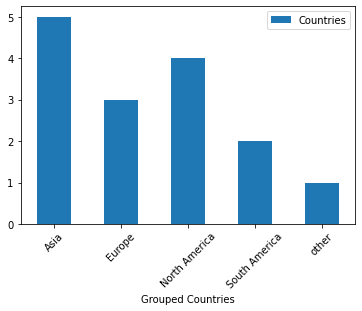

In [29]:
import matplotlib.pyplot as plt
data = df.groupby('Grouped Countries').count()
data.plot.bar(by='Grouped Countries', rot=45)

# Coninous feature binning

In [30]:

revenue_df = pd.read_excel('https://github.com/vbloise3/WhizLabsML/blob/master/binning/201_Revenue_Total.xlsx?raw=true')
revenue_df

,reference number,name,price,date
0,740150,Thomas LLC,3380.91,2018-01-01 07:21:51
1,714466,Sillians-Krapfs,-63.16,2018-01-01 10:00:47
2,218895,Snodgrass Inc,2086.10,2018-01-01 13:24:58
3,307599,"Craut, Oniote and Johnson",863.05,2018-01-01 15:05:22
4,412290,Judais-Pewrters,499.26,2018-01-01 23:26:55
...,...,...,...,...
1502,424914,Green-Brown,1582.49,2018-11-27 14:29:02
1503,424914,Green-Brown,1049.28,2018-12-19 15:15:41
1504,424914,Green-Brown,2166.75,2018-12-29 13:03:54
1505,424914,Green-Brown,1915.00,2018-12-22 03:31:36


<AxesSubplot:ylabel='Frequency'>

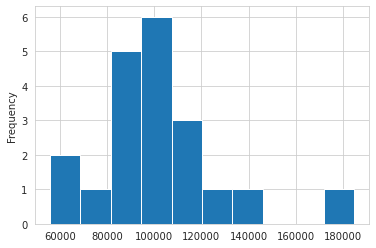

In [32]:
# Bin continuous datas by using a simple histogram
import seaborn as sns
sns.set_style('whitegrid')
df = revenue_df.groupby(['reference number', 'name'])['price'].sum().reset_index()
df['price'].plot(kind='hist')

In [33]:
df.price.describe()

count        20.000000
mean     101711.287500
std       27037.449673
min       55733.050000
25%       89137.707500
50%      100271.535000
75%      110132.552500
max      184793.700000
Name: price, dtype: float64

In [34]:
df['quantile_price_quartiles'] = pd.qcut(df['price'], q=4)
df['quantile_price_deciles'] = pd.qcut(df['price'], q=10, precision=0)
bin_labels_5 = ['Rookie', 'Sophomore', 'Junior', 'Senior', 'Professional']
df['quantile_price_quintiles'] = pd.qcut(df['price'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
df.head()

,reference number,name,price,quantile_price_quartiles,quantile_price_deciles,quantile_price_quintiles
0,141962,Speilmans LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]",Rookie
1,146832,Jones-Spank,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Junior
2,163416,Muns-Kalifan,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",Rookie
3,218895,Snodgrass Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]",Professional
4,239344,Finley LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Sophomore


In [35]:
# Check the bin ranges
results, bin_edges = pd.qcut(df['price'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=bin_labels_5,
                            retbins=True)

results_table = pd.DataFrame(zip(bin_edges, bin_labels_5),
                            columns=['Threshold', 'Tier'])
results_table

,Threshold,Tier
0,55733.050,Rookie
1,87167.958,Sophomore
2,95908.156,Junior
3,103605.970,Senior
4,112290.054,Professional
